In [59]:
import lightgbm as lgb
import numpy as np
from matplotlib import pyplot
from tqdm import tqdm_notebook as tqdm

In [60]:
X_train = np.load("../Data/train_jet_vars.npy")
X_test = np.load("../Data/test_jet_vars.npy")

In [61]:
import h5py
f_train_raw = h5py.File('../Data/train.h5','r')
f_test_raw = h5py.File('../Data/test.h5','r')

In [62]:
print(X_train.shape)

(412416, 23)


In [63]:
number_of_training_images = 4096

In [64]:
X_train = X_train[:number_of_training_images]
X_test = X_test

In [ ]:
weights_train = f_train_raw['all_events']['weight'][:number_of_training_images]
weights_test = f_test_raw['all_events']['weight'][:]

y_train = f_train_raw['all_events']['y'][:number_of_training_images]
y_test = f_test_raw['all_events']['y'][:]

passSR_train = f_test_raw['all_events']['passSR'][:number_of_training_images]
passSR_test = f_train_raw["all_events"]["passSR"][:]

In [66]:
import lightgbm as lgb
bdt = lgb.LGBMClassifier()
bdt_algo="lgb"
bdt.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [67]:
from sklearn.metrics import roc_auc_score
#if bdt_algo == "xgb":
y_pred = bdt.predict_proba(X_test)[:,1]
y_pred_train = bdt.predict_proba(X_train)[:,1]

In [68]:
print (roc_auc_score(y_true=y_train, y_score=y_pred_train))
print (roc_auc_score(y_true=y_test, y_score=y_pred))

1.0
0.9972217012378571


In [69]:
from sklearn import metrics
fpr_raw_bdt, tpr_raw_bdt, thresholds = metrics.roc_curve(y_test,y_pred,sample_weight=weights_test)
metrics.auc(fpr_raw_bdt, tpr_raw_bdt)

0.9950045617400248

(0, 0.0007, 0, 1)

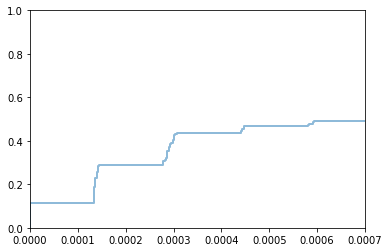

In [70]:
#pyplot.scatter(x_dot, y_dot)
pyplot.plot(fpr_raw_bdt, tpr_raw_bdt, lw=2,alpha=0.5)
pyplot.axis((0,.0007,0,1))
#pyplot.savefig("bdt result")

In [14]:
#np.save("../Results/Final_LGBM_all_trainingdata_testresults",y_pred)

# GET 24th Varible

In [71]:
X_24_train = np.load("../Results/BDT_24th_feature_train_4096.npy")
X_24_test = np.load("../Results/BDT_24th_feature_test_4096.npy")

In [72]:
print(X_24_train.shape)

(4096,)


In [73]:
X_train_new = np.hstack((X_train,X_24_train.reshape(-1,1)))
X_test_new = np.hstack((X_test,X_24_test.reshape(-1,1)))

In [74]:
import lightgbm as lgb
bdt = lgb.LGBMClassifier()
bdt_algo="lgb"
bdt.fit(X_train_new, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [75]:
from sklearn.metrics import roc_auc_score
#if bdt_algo == "xgb":
y_pred_new = bdt.predict_proba(X_test_new)[:,1]
y_pred_train_new = bdt.predict_proba(X_train_new)[:,1]

In [76]:
print (roc_auc_score(y_true=y_train, y_score=y_pred_train_new))
print (roc_auc_score(y_true=y_test, y_score=y_pred_new))

1.0
0.9969941998784686


In [77]:
from sklearn import metrics
fpr_raw_bdt_new, tpr_raw_bdt_new, thresholds = metrics.roc_curve(y_test,y_pred_new,sample_weight=weights_test)
metrics.auc(fpr_raw_bdt_new, tpr_raw_bdt_new)

0.9949212543797575

In [ ]:
x_dot = np.sum(weights_test[(passSR_test == 1) & (y_test == 0)]) / np.sum(weights_test[y_test==0])
y_dot = np.sum(weights_test[(passSR_test == 1) & (y_test == 1)]) / np.sum(weights_test[y_test==1])

In [ ]:
pyplot.plot(fpr_raw_bdt_new, tpr_raw_bdt_new, lw=2,alpha=0.5,label="opu + lgbm")
pyplot.plot(fpr_raw_bdt,tpr_raw_bdt,lw=2,alpha=0.5,label="lgbm")
pyplot.scatter(x_dot, y_dot,label="Physics selection")
pyplot.axis((0,.0007,0,1))
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.legend(loc = 'lower right')
pyplot.title("4096 training images")
#pyplot.savefig("bdt_result_4096_training_images")

In [26]:
#np.save("../Results/Final_LGBM_24v_all_trainingdata_testresults",y_pred_new)